<a href="https://colab.research.google.com/github/ram30098singh/Robot_Health_MarutiSuzuki/blob/main/Robot_FourierTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from scipy.fft import fft
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
pathToFolder = "/gdrive/My Drive/RAC_Maruti"

In [15]:
path = Path(pathToFolder) / "formatted_data.csv"

In [16]:
formatted_data = pd.read_csv(path)
formatted_data.head()

<ipython-input-16-267b3f56332a>:1: DtypeWarning: Columns (17,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  formatted_data = pd.read_csv(path)


,SNo,Current J1,Position J1,Current J2,Position J2,Current J3,Position J3,Current J4,Position J4,Current J5,...,Program Register,Program Name,Program Line Number,Robot Fault Output,Alarm,Battery Low Level Output,Date,TimeStamp,Quality,record_timestamp
0,1,-1.18,53.00,1.32,-22.00,-0.08,0.01,0.05,-0.01,0.12,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.744000,NaN,1.687504e+09
1,3,-1.88,52.95,-0.49,-22.02,-3.20,0.20,0.01,-0.30,1.84,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.794000,NaN,1.687504e+09
2,2,-1.88,52.95,-0.49,-22.02,-3.20,0.20,0.01,-0.30,1.84,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.794000,NaN,1.687504e+09
3,4,-4.78,52.74,-5.34,-22.11,3.05,1.13,-5.05,-1.77,6.95,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.857000,NaN,1.687504e+09
4,5,-9.12,52.02,-5.07,-22.35,3.90,2.95,-10.19,-4.77,12.25,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.920000,NaN,1.687504e+09


In [17]:
data = formatted_data
data.shape

(3959302, 24)

<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Fourier Transform of Current J1')

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Amplitude')

<Axes: >

Text(0.5, 1.0, 'Fourier Transform of Position J1')

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Amplitude')

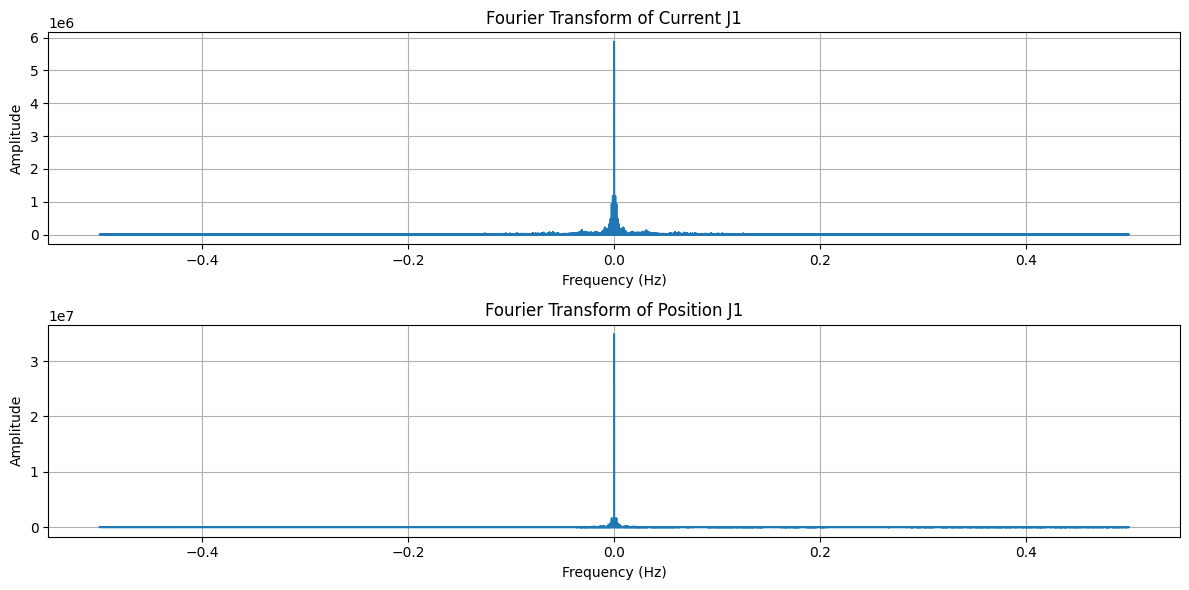

In [18]:
# Extract 'Current J1' and 'Position J1' columns
current_j1 = data['Current J1']
position_j1 = data['Position J1']

# Calculate the number of data points and create a time array
num_data_points = len(current_j1)
time = np.arange(num_data_points)

# Perform Fourier Transform on 'Current J1' and 'Position J1' columns
current_j1_fft = np.fft.fft(current_j1)
position_j1_fft = np.fft.fft(position_j1)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(num_data_points)

# Plot the Fourier Transform for 'Current J1'
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(current_j1_fft))
plt.title('Fourier Transform of Current J1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the Fourier Transform for 'Position J1'
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(position_j1_fft))
plt.title('Fourier Transform of Position J1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [19]:
from scipy.signal import find_peaks

In [20]:
# Find peaks in the magnitude spectrum
current_j1_peaks, _ = find_peaks(np.abs(current_j1_fft))

<Axes: >

Text(0.5, 1.0, 'Peaks in FFT')

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Amplitude')

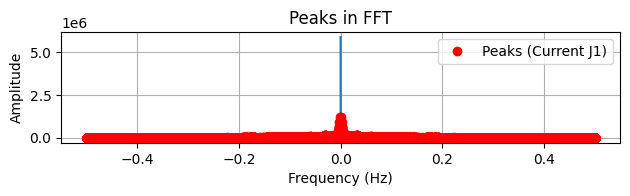

In [22]:
# Plot peaks on the FFT plots
plt.subplot(3, 1, 3)
plt.plot(frequencies, np.abs(current_j1_fft))
plt.plot(frequencies[current_j1_peaks], np.abs(current_j1_fft[current_j1_peaks]), 'ro', label='Peaks (Current J1)')
plt.title('Peaks in FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [23]:
# Find and print dominant frequencies
dominant_freq_current_j1 = frequencies[current_j1_peaks[np.argmax(np.abs(current_j1_fft[current_j1_peaks]))]]
dominant_freq_position_j1 = frequencies[position_j1_peaks[np.argmax(np.abs(position_j1_fft[position_j1_peaks]))]]

print("Dominant Frequency (Current J1):", dominant_freq_current_j1, "Hz")
print("Dominant Frequency (Position J1):", dominant_freq_position_j1, "Hz")

Dominant Frequency (Current J1): -0.0011219149233880114 Hz
Dominant Frequency (Position J1): -0.0022438298467760227 Hz


In [24]:
# Convert negative frequencies to positive and interpret in Hz
nyquist_freq = 0.5  # Nyquist frequency for normalized FFT
dominant_freq_current_j1 = frequencies[current_j1_peaks[np.argmax(np.abs(current_j1_fft[current_j1_peaks]))]]
dominant_freq_position_j1 = frequencies[position_j1_peaks[np.argmax(np.abs(position_j1_fft[position_j1_peaks]))]]

# Convert to positive frequencies in Hz
dominant_freq_current_j1_hz = np.abs(dominant_freq_current_j1) * nyquist_freq
dominant_freq_position_j1_hz = np.abs(dominant_freq_position_j1) * nyquist_freq

print("Dominant Frequency (Current J1):", dominant_freq_current_j1_hz, "Hz")
print("Dominant Frequency (Position J1):", dominant_freq_position_j1_hz, "Hz")


Dominant Frequency (Current J1): 0.0005609574616940057 Hz
Dominant Frequency (Position J1): 0.0011219149233880114 Hz


<Axes: >

Text(0.5, 1.0, 'Phase Spectrum of Current J1')

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Phase (radians)')

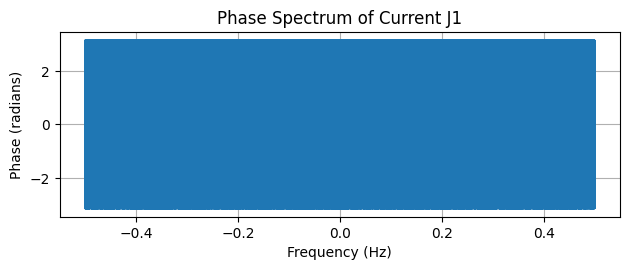

In [31]:
# Calculate the phase spectrum
phase_spectrum = np.angle(current_j1_fft)

# Plot the phase spectrum
plt.subplot(2, 1, 2)
plt.plot(frequencies, phase_spectrum)
plt.title('Phase Spectrum of Current J1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'FFT Magnitude vs. Frequency for Current J1')

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Magnitude')

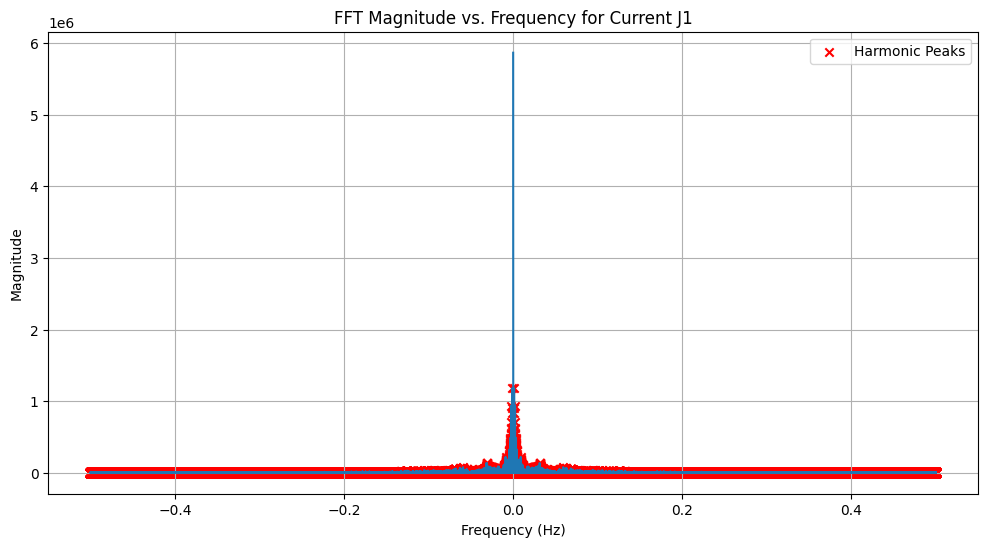

In [ ]:
magnitude_spectrum = np.abs(current_j1_fft)
peaks, _ = find_peaks(magnitude_spectrum, height=1000)  # Adjust the height threshold as needed
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude_spectrum)
plt.title('FFT Magnitude vs. Frequency for Current J1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Highlight the peaks
plt.scatter(frequencies[peaks], magnitude_spectrum[peaks], color='red', marker='x', label='Harmonic Peaks')
plt.legend()

# Show the plot
plt.show()


The amplitude at 0 Hz in the magnitude spectrum plot indicates how much of this DC component is present in our signal. If the amplitude at 0 Hz is high, it suggests that a significant portion of our signal is made up of a constant value.



In [ ]:
# Remove the DC offset by subtracting the mean value
current_j1_without_dc = current_j1 - np.mean(current_j1)


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'FFT Magnitude vs. Frequency for Current J1 (After Removing DC Offset)')

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Magnitude')

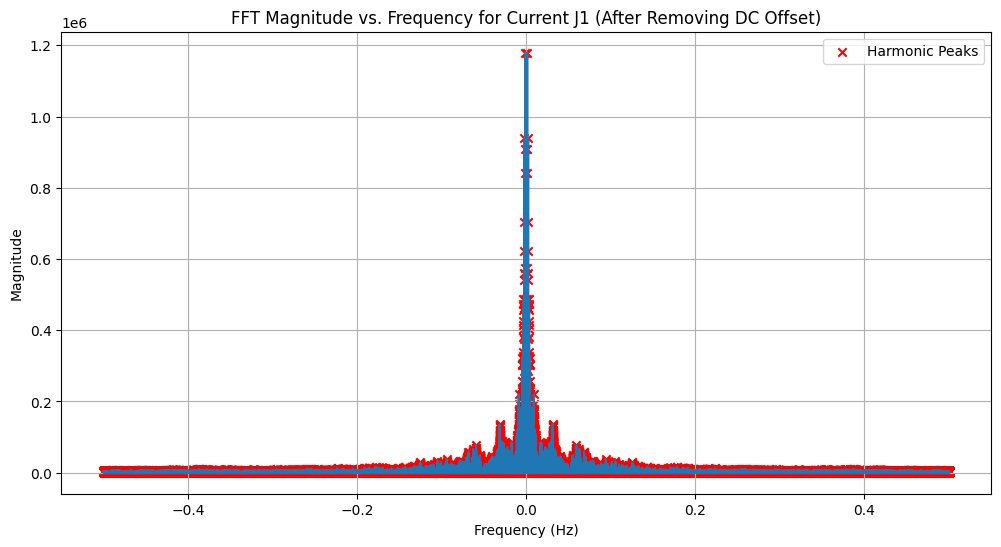

In [ ]:
num_data_points = len(current_j1_without_dc)
current_j1_fft = np.fft.fft(current_j1_without_dc)
frequencies = np.fft.fftfreq(num_data_points)
magnitude_spectrum = np.abs(current_j1_fft)
peaks, _ = find_peaks(magnitude_spectrum, height=1000)  # Adjust the height threshold as needed
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude_spectrum)
plt.title('FFT Magnitude vs. Frequency for Current J1 (After Removing DC Offset)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Highlight the peaks
plt.scatter(frequencies[peaks], magnitude_spectrum[peaks], color='red', marker='x', label='Harmonic Peaks')
plt.legend()

# Show the plot
plt.show()


Windowing: Apply different window functions (e.g., Hanning) before performing the FFT to reduce spectral leakage and improve frequency resolution, especially when analyzing short segments of data.

<ipython-input-14-75d470e4a49a>:6: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  windowed_signal = current_j1 * hann(len(current_j1))


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'FFT Magnitude vs. Frequency for Current J1 (After Applying Hanning Window, with DC Offset)')

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Magnitude')

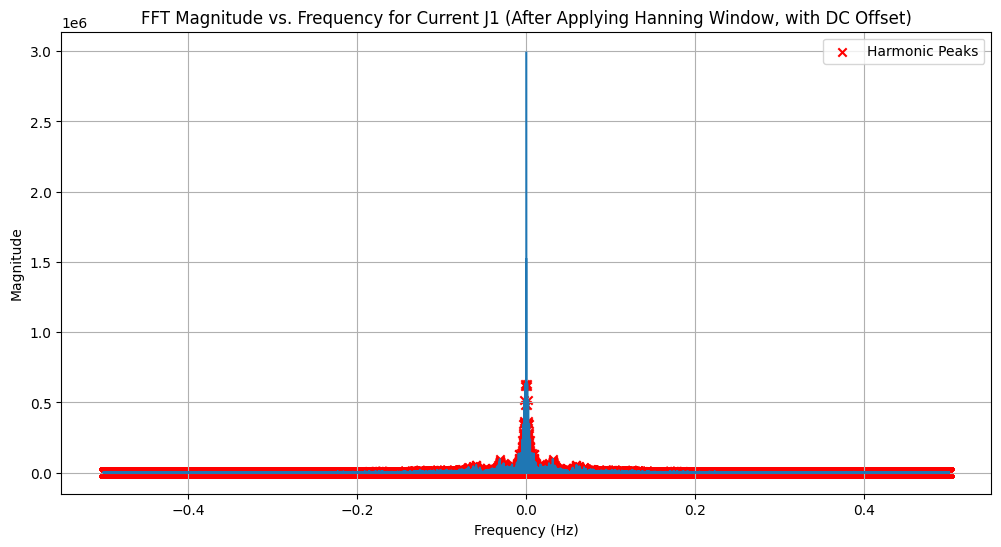

In [ ]:
from scipy.signal import find_peaks, hann

current_j1 = data['Current J1']

# Apply a Hanning window without removing the DC offset
windowed_signal = current_j1 * hann(len(current_j1))

# Perform Fourier Transform on the windowed signal
num_data_points = len(windowed_signal)
current_j1_fft = np.fft.fft(windowed_signal)
frequencies = np.fft.fftfreq(num_data_points)

# Calculate the magnitude of the Fourier Transform
magnitude_spectrum = np.abs(current_j1_fft)

# Find peaks in the magnitude spectrum to identify harmonic components
peaks, _ = find_peaks(magnitude_spectrum, height=1000)  # Adjust the height threshold as needed

# Plot the magnitude spectrum and highlight the identified peaks
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude_spectrum)
plt.title('FFT Magnitude vs. Frequency for Current J1 (After Applying Hanning Window, with DC Offset)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Highlight the peaks
plt.scatter(frequencies[peaks], magnitude_spectrum[peaks], color='red', marker='x', label='Harmonic Peaks')
plt.legend()

# Show the plot
plt.show()
